# Delhi AQI Analysis: From Pollution Data to Health Decisions

This project analyzes Delhi’s Air Quality Index (AQI) to identify:
- High-risk pollution periods
- Seasonal pollution patterns
- Major pollutant contributors

The goal is to transform AQI numbers into actionable public-health insights.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [17]:
df = pd.read_csv("delhi_aqi.csv")
df.head()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [18]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns


Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='str')

In [19]:
required_cols = ["aqi", "pm2.5", "pm10", "no2", "so2"]

missing = [col for col in required_cols if col not in df.columns]
missing


['aqi', 'pm2.5']

In [20]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

df["season"] = df["month"].map({
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Summer", 4: "Summer", 5: "Summer",
    6: "Monsoon", 7: "Monsoon", 8: "Monsoon",
    9: "Post-Monsoon", 10: "Post-Monsoon", 11: "Post-Monsoon"
})

df.head()


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,month,year,season
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,11,2020,Post-Monsoon
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,11,2020,Post-Monsoon
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,11,2020,Post-Monsoon
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,11,2020,Post-Monsoon
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,11,2020,Post-Monsoon


In [25]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df.isnull().sum()


date            0
co              0
no              0
no2             0
o3              0
so2             0
pm2_5           0
pm10            0
nh3             0
month           0
year            0
season          0
aqi_category    0
dtype: int64

In [23]:
def aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 200:
        return "Poor"
    elif aqi <= 300:
        return "Very Poor"
    else:
        return "Severe"

df["aqi_category"] = df["pm2_5"].apply(aqi_category)
df["aqi_category"].value_counts()


aqi_category
Poor         5274
Severe       4957
Moderate     3856
Very Poor    2649
Good         2040
Name: count, dtype: int64

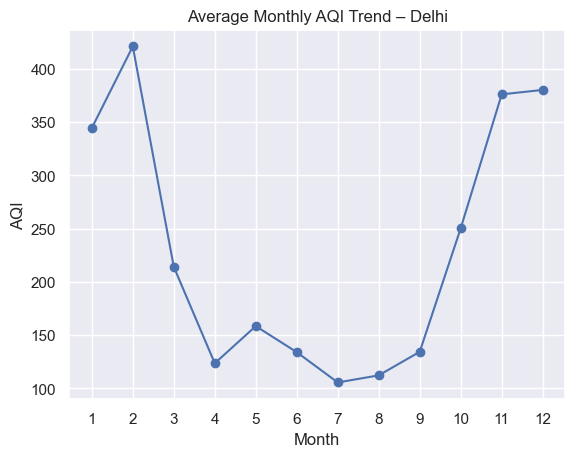

In [28]:

# Ensure the correct column is used for AQI calculation
monthly_aqi = df.groupby("month")["pm2_5"].mean()

plt.figure()
plt.plot(monthly_aqi.index, monthly_aqi.values, marker='o')
plt.title("Average Monthly AQI Trend – Delhi")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.xticks(range(1,13))
plt.show()


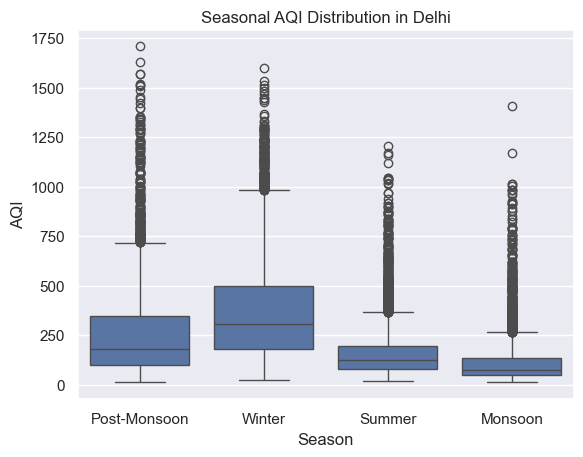

In [30]:
plt.figure()
sns.boxplot(x="season", y="pm2_5", data=df)
plt.title("Seasonal AQI Distribution in Delhi")
plt.xlabel("Season")
plt.ylabel("AQI")
plt.show()


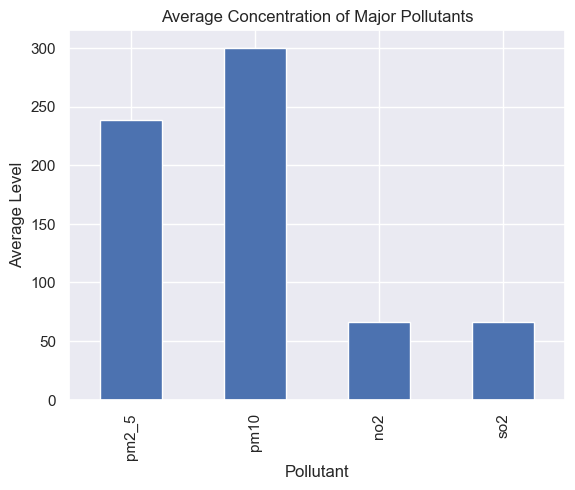

In [32]:
pollutants = ["pm2_5", "pm10", "no2", "so2"]
pollutant_avg = df[pollutants].mean()

plt.figure()
pollutant_avg.plot(kind="bar")
plt.title("Average Concentration of Major Pollutants")
plt.xlabel("Pollutant")
plt.ylabel("Average Level")
plt.show()


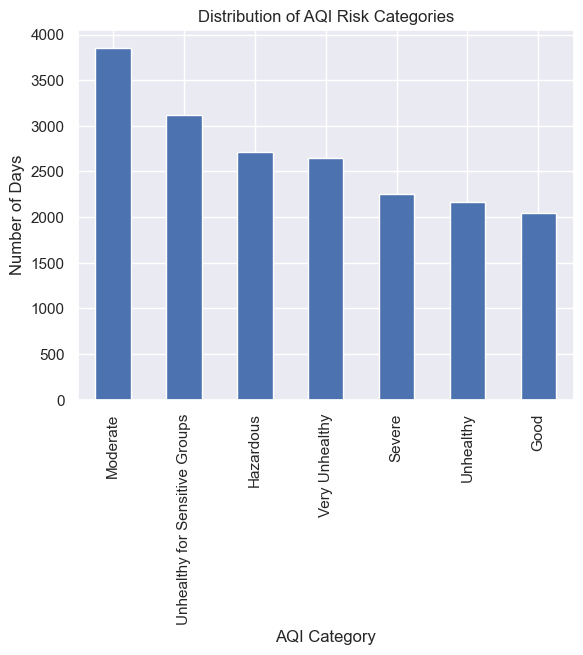

In [33]:
risk_counts = df["aqi_category"].value_counts()

plt.figure()
risk_counts.plot(kind="bar")
plt.title("Distribution of AQI Risk Categories")
plt.xlabel("AQI Category")
plt.ylabel("Number of Days")
plt.show()


## Key Findings
- Winter and post-monsoon seasons exhibit the worst AQI levels.
- PM2.5 and PM10 are the most dominant pollutants contributing to high AQI.
- A significant number of days fall under Poor to Severe air quality.
- AQI volatility is higher during colder months.
